   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00


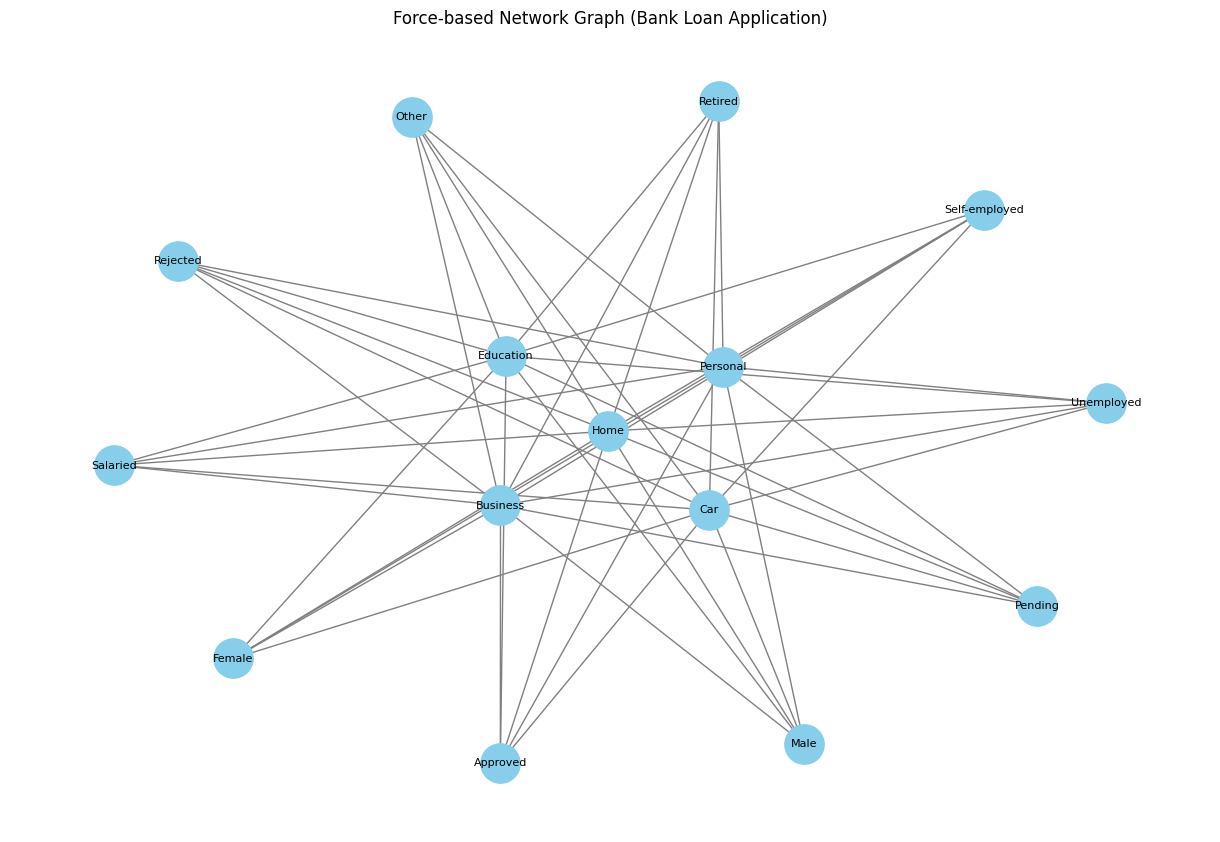

banking_network.html


In [ ]:
!pip install PyVis
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

# Load dataset
df = pd.read_csv("banking_loan_applications.csv")

# ----------------------------------------
# Step 1: Create Source-Target Relationships
# Example: Connect Gender -> Loan Purpose
# ----------------------------------------
edges = []
for _, row in df.iterrows():
    edges.append((row['Gender'], row['Loan_Purpose']))     # gender to loan purpose
    edges.append((row['Employment_Type'], row['Loan_Purpose']))  # employment type to loan purpose
    edges.append((row['Loan_Purpose'], row['Loan_Status']))      # loan purpose to status

# ----------------------------------------
# Step 2: Build Graph
# ----------------------------------------
G = nx.Graph()
G.add_edges_from(edges)

# ----------------------------------------
# Step 3: Visualize with Force-based Layout (Spring layout in NetworkX)
# ----------------------------------------
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # force-directed layout
nx.draw(G, pos, with_labels=True, node_size=800, node_color="skyblue", font_size=8, edge_color="gray")
plt.title("Force-based Network Graph (Bank Loan Application)")
plt.show()

# ----------------------------------------
# Step 4: Interactive Visualization with PyVis
# ----------------------------------------
net = Network(notebook=True, height="600px", width="100%", bgcolor="white", font_color="black")

# Convert NetworkX graph to PyVis network
net.from_nx(G)

# Save and show
net.show("banking_network.html")
